## My Attempt at finding values for $A_r$

Conclusion: Harry's are better

In [2]:
import numpy as np

# Constants
delta = 4.669201609102990  
# Known initial values
A_values = [2, 1 + np.sqrt(5)]  # Initial terms: A_0, A_1

# Function to calculate A_r values for given r values
def calculate_A_r(num_terms):
    for r in range(2, num_terms):  # Start from the 3rd term
        A_next = A_values[-1] + 1 / (delta ** (r - 1))
        A_values.append(A_next)
    return A_values

# Calculate A_r values up to a desired number of terms
num_terms = 10
A_r_values = calculate_A_r(num_terms)
for r, A_r in enumerate(A_r_values):
    print(f"A_{r} = {A_r}")

A_0 = 2
A_1 = 3.23606797749979
A_2 = 3.450237354562116
A_3 = 3.496105876633381
A_4 = 3.5059295094321534
A_5 = 3.5080334307491556
A_6 = 3.508484026267006
A_7 = 3.5085805300283712
A_8 = 3.5086011981788268
A_9 = 3.5086056246637347


## Attempt at an algorithm to produce the iterantions of the function

It works apart from loop where my coding inability is having index problems 

In [2]:
#Harry's list of A values
A_List = [2, 3.23606797749979, 3.4985479775008543, 3.554637435512696,
          3.5666663858959753, 3.569243282100676, 3.569795227423478,
          3.5699134489582596, 3.5699387708186654, 3.5699441935758296,
          3.5699453551991143]
alpha = 2.5029
# Defining the x values for plotting
x_vals = np.linspace(-0.5, 0.5, 500)

# Setting g_0
def g_0(A,x):
    g_vals = A * (1/4 - x**2)
    return g_vals

# Function for recursive expression for g_r
def g_many(x ,A):
    #A values 
    A_array = A
    alpha = 2.5029
    #r interation counter
    r_i = len(A)
    print(r_i)
    r = [1,2,3,4,5]
    #g_value array
    g_values = []
    #g_i = (-alpha)^i * g_0(A_array[i],x/(-alpha))
    g_start = g_0(A_array[0],x)
    g_values.append(g_start)
    r = [1,2]
    for i in r:   #for every r value
        for j in range(1,r[i]):   #iterate loop amount of times corresponding to r value
            F_j = g_0(A_array[j],x/(-alpha))
            F_new = g_0(A_array[j],F_j/(-alpha))
    
        g_new = ((-alpha)**r[i-1]) * (F_new)
    g_values.append(g_new)

    plt.plot(x,g_values[0], label = "g_0")
    plt.plot(x,g_values[1], label = "g_1")
    plt.legend()

g_many(x_vals,A_List)

11


IndexError: list index out of range

## Brute Force Graphing Method

First 3 expressions for $g_{1r}$, given $r \in \{0,1\}$, dervived via brute force expansion for $r=2,3$ such that $g_{1,2}=(-\alpha)^2*F(A_3,F(A_3, F(A_3, F(A_3,\frac{x}{(-\alpha)^2}))))$ and $g_{1,3}=(-\alpha)^3*F(A_4, F(A_4, F(A_4, F(A_4, F(A_4,F(A_4, F(A_4, F(A_4,\frac{x}{(-\alpha)^3}))))$ where $F_0(A_{1},\frac{x}{(-\alpha)^0}) = (-\alpha)^0A_1*(\frac{1}{4}-(\frac{x}{(-\alpha)})^2)$

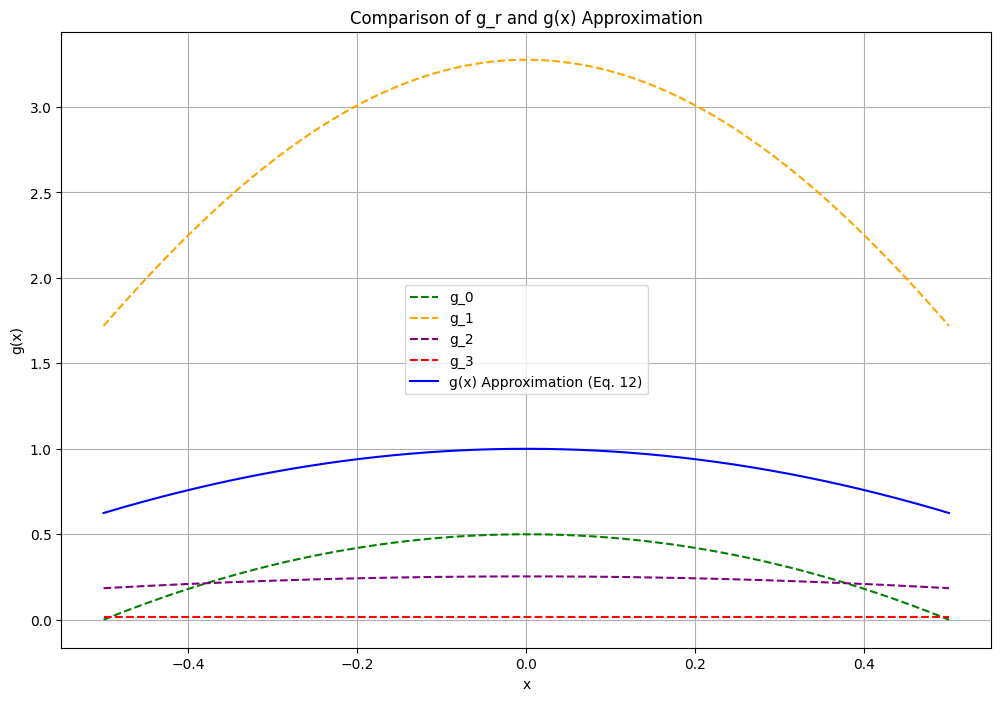

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Harry's A_List values
A_List = [2, 3.23606797749979, 3.4985479775008543, 3.554637435512696,
          3.5666663858959753, 3.569243282100676, 3.569795227423478,
          3.5699134489582596, 3.5699387708186654, 3.5699441935758296,
          3.5699453551991143]
alpha = 2.5029

# Define x values for plotting
x_vals = np.linspace(-0.5, 0.5, 500)

# Equation (12) approximation for g(x)
def g_approximation(x):
    return 1 - 1.52763 * x**2 + 0.10482 * x**4 - 0.02671 * x**6

# Compute g_r for r in {0,1,2,3} via brute force
def g_0(x):
    A1 = A_List[0]
    return A1 * (1/4 - x**2)

def g_1(x):
    A2 = A_List[1]
    return alpha * A2 * (
        (1/4) * (1/4 * A2**2 - 1) - (1/2) * (A2**2 * x**2 / alpha**2) + (A2**2 * x**4 / alpha**4))

def g_2(x):
    A3 = A_List[2]
    return (-alpha)**2 * A3 * (
        (1/4) * (1/4 * A3**2 - 1) - (1/2) * (A3**2 * (A3 * (1/4 - (((A3 * (1/4 - (x/(-alpha)**2)**2)))/(-alpha)**2)**2))**2 / alpha**2) + (A3**2 * ((A3 * (1/4 - (((A3 * (1/4 - (x/(-alpha)**2)**2)))/(-alpha)**2)**2)))**4 / alpha**4))

def g_3(x):
    A4 = A_List[3]
    return (-alpha)**3 * A4 * (
        (1/4) * (1/4 * A4**2 - 1) - (1/2) * (A4**2 * (A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - ((1/4 - ((1/4 - (x/(-alpha)**3)**2)/(-alpha)**3)**2)/(-alpha)**3)**2)))/(-alpha)**3)**2)))/(-alpha)**2)**2)))/(-alpha)**2)**2))**2 / alpha**2) + (A4**2 * ((A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - ((1/4 - ((1/4 - (x/(-alpha)**3)**2)/(-alpha)**3)**2)/(-alpha)**3)**2)))/(-alpha)**3)**2)))/(-alpha)**2)**2)))/(-alpha)**2)**2)))**4 / alpha**4))

# Latex for g_r
import sympy as sym
from IPython.display import display_latex
x = sym.symbols('x')
A0 = sym.symbols('A0')
A1 = sym.symbols('A1')
A2 = sym.symbols('A2')
A3 = sym.symbols('A3')
A4 = sym.symbols('A4')
alpha = sym.symbols('alpha')
display_latex(A1 * (1/4 - x**2))
display_latex(alpha * A2 * ((1/4) * (1/4 * A2**2 - 1) - (1/2) * (A2**2 * x**2 / alpha**2) + (A2**2 * x**4 / alpha**4)))
display_latex((-alpha)**2 * A3 * ((1/4) * (1/4 * A3**2 - 1) - (1/2) * (A3**2 * (A3 * (1/4 - (((A3 * (1/4 - (x/(-alpha)**2)**2)))/(-alpha)**2)**2))**2 / alpha**2) + (A3**2 * ((A3 * (1/4 - (((A3 * (1/4 - (x/(-alpha)**2)**2)))/(-alpha)**2)**2)))**4 / alpha**4)))
display_latex((-alpha)**3 * A4 * ((1/4) * (1/4 * A4**2 - 1) - (1/2) * (A4**2 * (A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (x/(-alpha)**3)**2)))/(-alpha)**3)**2)))/(-alpha)**2)**2)))/(-alpha)**2)**2))**2 / alpha**2) + (A4**2 * ((A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (((A4 * (1/4 - (x/(-alpha)**3)**2)))/(-alpha)**3)**2)))/(-alpha)**2)**2)))/(-alpha)**2)**2)))**4 / alpha**4)))

# Redefine alpha
alpha = 2.5029
# Plot g_0, g_1, g_2, g_3 and the approximation
plt.figure(figsize=(12, 8))
x_vals = np.linspace(-0.5, 0.5, 500)

# Plotting g_0 to g_3
plt.plot(x_vals, g_0(x_vals), label='g_0', linestyle='--', color='green')
plt.plot(x_vals, g_1(x_vals), label='g_1', linestyle='--', color='orange')
plt.plot(x_vals, g_2(x_vals), label='g_2', linestyle='--', color='purple')
plt.plot(x_vals, g_3(x_vals), label='g_3', linestyle='--', color='red')

# Plot the approximation for g(x)
plt.plot(x_vals, g_approximation(x_vals), label='g(x) Approximation (Eq. 12)', color='blue')

plt.title('Comparison of g_r and g(x) Approximation')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid(True)
plt.show()

0.0
1.389388604167152e-16
7197410407719839.0
-5.322376672759134e-05
-18788.598806209586
-6.131456462725438e-05
-16309.338671476093
-8.283284780107026e-05
-12072.505371318157
-9.704363095147026e-05
-10304.643284628146


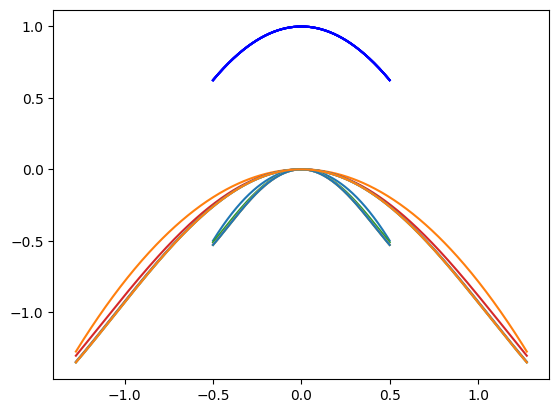

0.30901699437494745
3.2360679774997894
0.2913232472401501
3.4326131178115618
0.28799003188259653
3.4723424052665304
0.2873141608112817
3.480510661835551
0.28716981132809344
3.4822601838794722
0.2871313681776187
3.4827264131636175


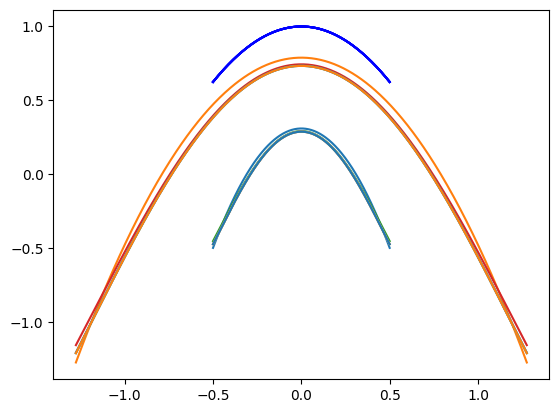

0.3746369943752136
2.669250541227813
0.37115578998368653
2.6942864074515804
0.3688657266657107
2.711013595758282
0.3686206587711695
2.7128159429088727
0.3685520209705438
2.7133211679767837
0.3685389881107438
2.713417120740305


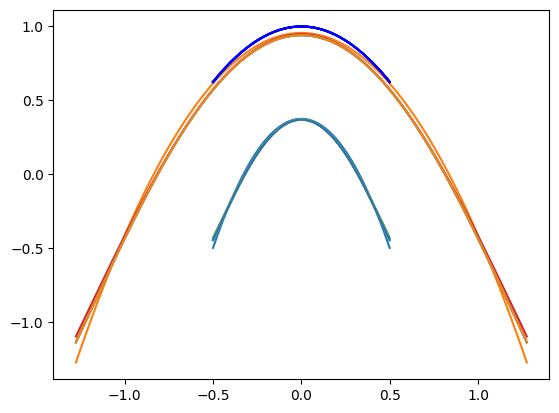

0.38865935887817404
2.5729471763819065
0.38912520828786534
2.569866918671135
0.38708885928489317
2.583386155435724
0.38697316899561085
2.584158489839233
0.3869268301627481
2.584467971836905
0.38692103595647176
2.584506674670692


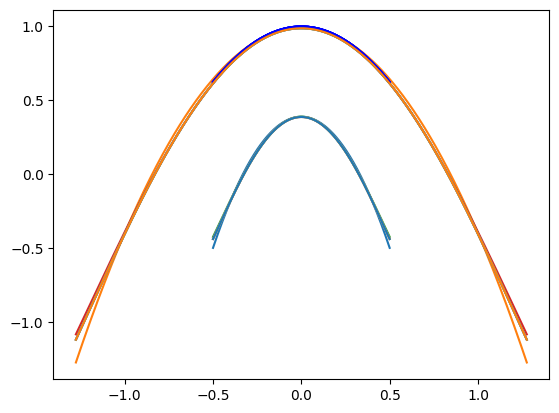

0.3916665964739938
2.553191946932852
0.3930140904928886
2.5444380346411384
0.39103327517186043
2.5573271214847297
0.39094724921000434
2.557889848363742
0.3909059546811876
2.5581600587680304
0.3909011165805234
2.558191720575466


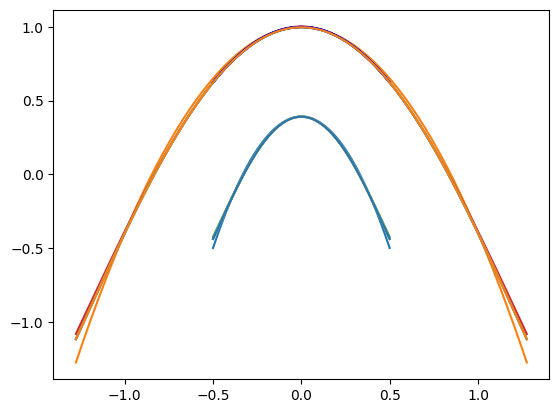

0.39231082052516897
2.5489992824091487
0.39384886159730814
2.539045043685953
0.3918800223000367
2.5518014266988223
0.3918004373209492
2.552319764719494
0.3917600896610413
2.5525826300101677
0.39175569716320874
2.5526112504329235


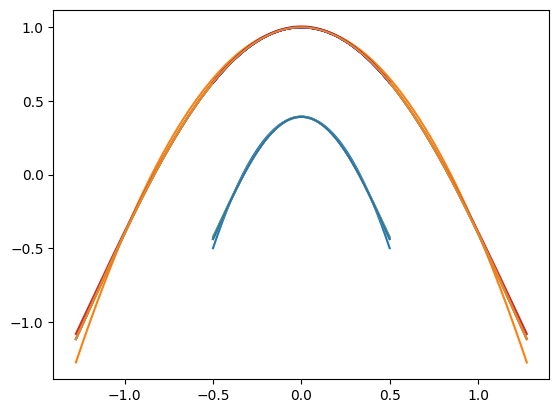

In [15]:
def F(a,x):
    return a*(1/4-x*x)-1/2


def Fit(a,x,n):
    if n == 1 :
        return F(a,x)
    else:
        return Fit(a, F(a,x), n-1)

def gr(a,x,r):
    alpha = 2.5029
    return (-alpha)**r *Fit(a,x/(-alpha)**r,2**r)
    

a= [2, 3.23606797749979, 3.4985479775008543, 3.554637435512696,
    3.5666663858959753, 3.569243282100676, 3.569795227423478,
    3.5699134489582596, 3.5699387708186654, 3.5699441935758296,
    3.5699453551991143]


# Solving for g_k(x) for increasing r
x = np.linspace(-1/2, 1/2, 500)
for k in range(0, 6):
    for i in range(0, 6):
        plt.plot(x, gr(a[i+k], x, i))
        plt.plot(x_vals, g_approximation(x_vals), label='g(x) Approximation (Eq. 12)', color='blue')
        print(gr(a[i+k], 0, i))
        if gr(a[i+k], 0, i)!= 0:
            print(1/gr(a[i+k], 0, i))
        plt.plot(x*2.5526112504329235,2.5526112504329235*gr(a[i+k], x, i) )
    plt.show()

#plt.plot(x, g_approximation(x))
plt.show()


Value of g at 0 for: 0.0
Our value for alpha 0.19587784858160437
Value of g at 0 for: 1.389388604167152e-16
value of of the scaling factor: 7197410407719839.0
Our value for alpha 0.133839724494645
Value of g at 0 for: -5.322376672759134e-05
value of of the scaling factor: -18788.598806209586
Our value for alpha 0.12540552508677316
Value of g at 0 for: -6.131456462725438e-05
value of of the scaling factor: -16309.338671476093
Our value for alpha 0.12373923245218756
Value of g at 0 for: -8.283284780107026e-05
value of of the scaling factor: -12072.505371318157
Our value for alpha 0.12338762933730117
Value of g at 0 for: -9.704363095147026e-05
value of of the scaling factor: -10304.643284628146
Our value for alpha 0.12331256704428929


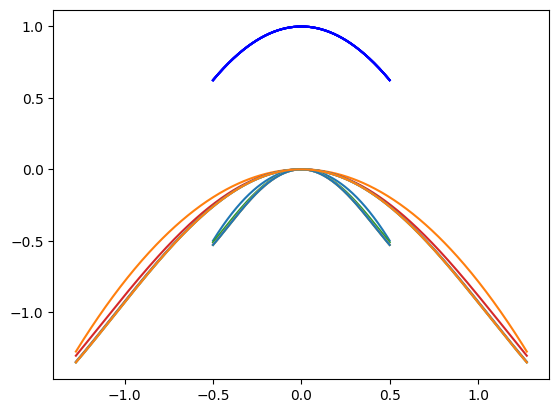

Value of g at 0 for: 0.30901699437494745
value of of the scaling factor: 3.2360679774997894
Our value for alpha 0.133839724494645
Value of g at 0 for: 0.2913232472401501
value of of the scaling factor: 3.4326131178115618
Our value for alpha 0.12540552508677316
Value of g at 0 for: 0.28799003188259653
value of of the scaling factor: 3.4723424052665304
Our value for alpha 0.12373923245218756
Value of g at 0 for: 0.2873141608112817
value of of the scaling factor: 3.480510661835551
Our value for alpha 0.12338762933730117
Value of g at 0 for: 0.28716981132809344
value of of the scaling factor: 3.4822601838794722
Our value for alpha 0.12331256704428929
Value of g at 0 for: 0.2871313681776187
value of of the scaling factor: 3.4827264131636175
Our value for alpha 0.1232965013280562


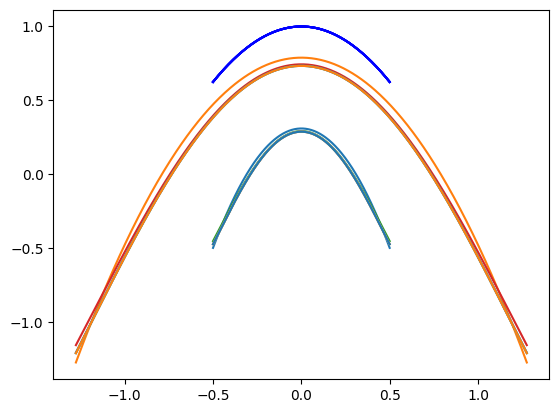

Value of g at 0 for: 0.3746369943752136
value of of the scaling factor: 2.669250541227813
Our value for alpha 0.12540552508677316
Value of g at 0 for: 0.37115578998368653
value of of the scaling factor: 2.6942864074515804
Our value for alpha 0.12373923245218756
Value of g at 0 for: 0.3688657266657107
value of of the scaling factor: 2.711013595758282
Our value for alpha 0.12338762933730117
Value of g at 0 for: 0.3686206587711695
value of of the scaling factor: 2.7128159429088727
Our value for alpha 0.12331256704428929
Value of g at 0 for: 0.3685520209705438
value of of the scaling factor: 2.7133211679767837
Our value for alpha 0.1232965013280562
Value of g at 0 for: 0.3685389881107438
value of of the scaling factor: 2.713417120740305
Our value for alpha 0.12329306074597766


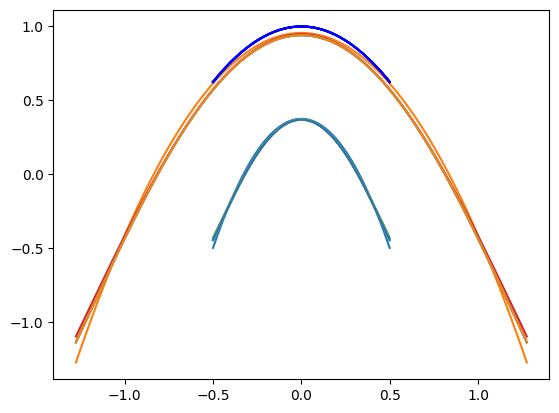

Value of g at 0 for: 0.38865935887817404
value of of the scaling factor: 2.5729471763819065
Our value for alpha 0.12373923245218756
Value of g at 0 for: 0.38912520828786534
value of of the scaling factor: 2.569866918671135
Our value for alpha 0.12338762933730117
Value of g at 0 for: 0.38708885928489317
value of of the scaling factor: 2.583386155435724
Our value for alpha 0.12331256704428929
Value of g at 0 for: 0.38697316899561085
value of of the scaling factor: 2.584158489839233
Our value for alpha 0.1232965013280562
Value of g at 0 for: 0.3869268301627481
value of of the scaling factor: 2.584467971836905
Our value for alpha 0.12329306074597766
Value of g at 0 for: 0.38692103595647176
value of of the scaling factor: 2.584506674670692
Our value for alpha 0.12329232383296575


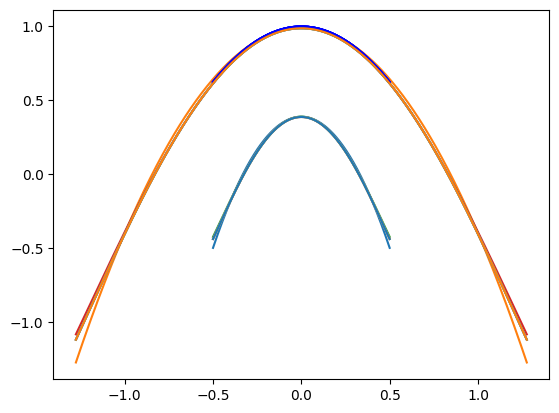

Value of g at 0 for: 0.3916665964739938
value of of the scaling factor: 2.553191946932852
Our value for alpha 0.12338762933730117
Value of g at 0 for: 0.3930140904928886
value of of the scaling factor: 2.5444380346411384
Our value for alpha 0.12331256704428929
Value of g at 0 for: 0.39103327517186043
value of of the scaling factor: 2.5573271214847297
Our value for alpha 0.1232965013280562
Value of g at 0 for: 0.39094724921000434
value of of the scaling factor: 2.557889848363742
Our value for alpha 0.12329306074597766
Value of g at 0 for: 0.3909059546811876
value of of the scaling factor: 2.5581600587680304
Our value for alpha 0.12329232383296575
Value of g at 0 for: 0.3909011165805234
value of of the scaling factor: 2.558191720575466
Our value for alpha 0.12329216602183923


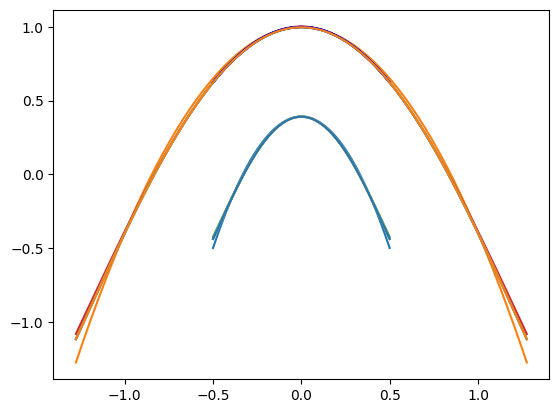

Value of g at 0 for: 0.39231082052516897
value of of the scaling factor: 2.5489992824091487
Our value for alpha 0.12331256704428929
Value of g at 0 for: 0.39384886159730814
value of of the scaling factor: 2.539045043685953
Our value for alpha 0.1232965013280562
Value of g at 0 for: 0.3918800223000367
value of of the scaling factor: 2.5518014266988223
Our value for alpha 0.12329306074597766
Value of g at 0 for: 0.3918004373209492
value of of the scaling factor: 2.552319764719494
Our value for alpha 0.12329232383296575
Value of g at 0 for: 0.3917600896610413
value of of the scaling factor: 2.5525826300101677
Our value for alpha 0.12329216602183923
Value of g at 0 for: 0.39175569716320874
value of of the scaling factor: 2.5526112504329235
Our value for alpha 0.1232921322167492


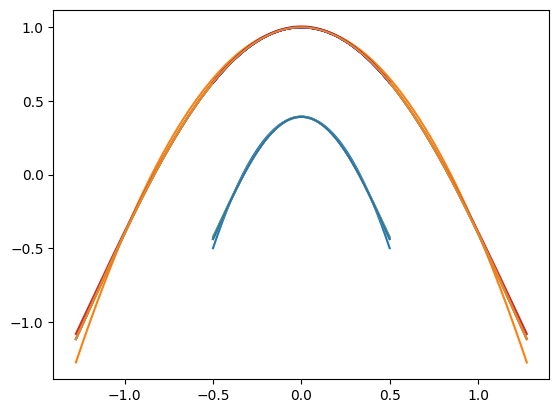

In [ ]:
scale_factor = 2.5526112504329235
alpha = 2.5029

def F(a, x):
    return a * (1/4 - x*x) - 1/2

def Fit(a, x, n):
    if n == 1:
        return F(a, x)
    else:
        return Fit(a, F(a, x), n-1)

def gr(a, x, r):
    return (-alpha)**r * Fit(a, x / (-alpha)**r, 2**r)

def g_scaled(a, x, r):
    return scale_factor * gr(a, x, r)

a = [2, 3.23606797749979, 3.4985479775008543, 3.554637435512696,
     3.5666663858959753, 3.569243282100676, 3.569795227423478,
     3.5699134489582596, 3.5699387708186654, 3.5699441935758296,
     3.5699453551991143]

# Solving for g_k(x) for increasing r
x = np.linspace(-1/2, 1/2, 500)

for k in range(0, 6):
    for i in range(0, 6):
        plt.plot(x, gr(a[i+k], x, i))
        print(f"Value of g at 0 for: {gr(a[i+k], 0, i)}")
        plt.plot(x_vals, g_approximation(x_vals), label='g(x) Approximation (Eq. 12)', color='blue')
        if gr(a[i+k], 0, i) != 0:
            print(f"value of of the scaling factor: {1 / gr(a[i+k], 0, i)}")
        plt.plot(x * 2.5526112504329235, g_scaled(a[i+k], x, i))
        print(f"Our value for alpha: {-1 / g_scaled(a[i+k], 1, 0)}")  # Example using the first value of a
    plt.show()

plt.show()